In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#使用中文字体
mpl.rcParams['font.family']=['Microsoft Yahei','sans-serif']
mpl.rcParams['axes.unicode_minus']=False

#使用svg格式，避免图形模糊
%matplotlib inline
%config InlineBackend.figure_format="svg"

In [26]:
#读取数据
import pandas as pd
df = pd.read_csv("house-prices.csv")
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


# 探索性分析

### Brick列

In [27]:
# 查看Brick列的情况
df["Brick"].astype("category")

0       No
1       No
2       No
3       No
4       No
      ... 
123    Yes
124    Yes
125     No
126     No
127     No
Name: Brick, Length: 128, dtype: category
Categories (2, object): ['No', 'Yes']

In [28]:
# 根据Brick列对数据分组，查看两组的情况
df.groupby("Brick").describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Brick,,,,,,,,
No,86.0,121958.139535,22589.260671,69100.0,106675.0,117650.0,137825.0,180900.0
Yes,42.0,147769.047619,26829.384038,106100.0,125850.0,147500.0,166650.0,211200.0


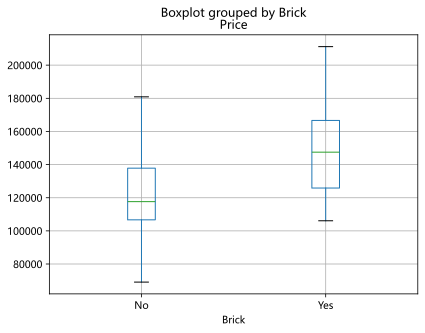

In [29]:
# 绘制Brick分组后Price的箱线图
df.boxplot("Price","Brick")
plt.show()

### Neighborhood列

In [30]:
# 查看Neighborhood列情况
df["Neighborhood"].astype("category")

0       East
1       East
2       East
3       East
4       East
       ...  
123     East
124     East
125    North
126     West
127    North
Name: Neighborhood, Length: 128, dtype: category
Categories (3, object): ['East', 'North', 'West']

In [31]:
#根据Neighborhood列分类，查看各组的Price情况
df.groupby("Neighborhood").describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
East,45.0,125231.111111,17866.052398,82300.0,114300.0,123100.0,139600.0,157100.0
North,44.0,110154.545455,15973.880636,69100.0,102575.0,110750.0,117575.0,150200.0
West,39.0,159294.871795,19781.729326,129800.0,144850.0,155400.0,171750.0,211200.0


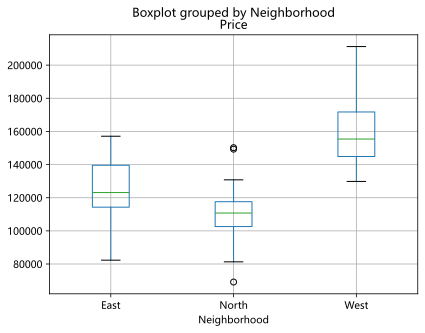

In [32]:
df.boxplot("Price","Neighborhood")
plt.show()

### 交叉作用

In [33]:
# 生成交叉列
df["mix"] = df["Neighborhood"]+"-"+df["Brick"]

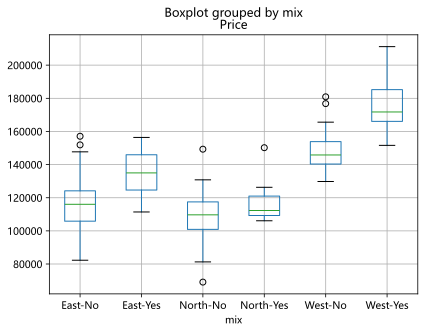

In [34]:
# 绘制箱型图
df.boxplot("Price","mix")
plt.show()

# ANOVA

In [35]:
from statsmodels.formula.api import ols
model = ols("Price ~ C(Brick) * C(Neighborhood)", data=df)
lm = model.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     52.73
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           6.82e-29
Time:                        16:16:59   Log-Likelihood:                -1412.9
No. Observations:                 128   AIC:                             2838.
Df Residuals:                     122   BIC:                             2855.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                 1.177e+05   3023.826     38.941      0.000    1.12e+05    1.24e+05
C(Brick)[T.Yes]                           1.772e+04   4653.570      3.807      0.000    8506.214    2.69e+04
C(Neighborhood)[T.North]                 -9166.2162   3945.720     -2.323      0.022    -1.7e+04   -1355.270
C(Neighborhood)[T.West]                   3.048e+04   4413.580      6.906      0.000    2.17e+04    3.92e+04
C(Brick)[T.Yes]:C(Neighborhood)[T.North] -7845.0620   7876.710     -0.996      0.321   -2.34e+04    7747.672
C(Brick)[T.Yes]:C(Neighborhood)[T.West]   9251.1442   6844.714      1.352      0.179   -4298.650    2.28e+04
==============================================================================
Omnibus:                        3.499   Durbin-Watson:                   2.211
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                2.972
Skew:                           0.351   Prob(JB):                        0.226
Kurtosis:                       3.255   Cond. No.                         8.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
from statsmodels.stats.anova import anova_lm
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(Brick),1.0,1.879942e+10,1.879942e+10,79.078300,6.575804e-15
C(Neighborhood),2.0,4.277697e+10,2.138849e+10,89.969032,9.839202e-25
C(Brick):C(Neighborhood),2.0,1.105563e+09,5.527814e+08,2.325233,1.020788e-01
Residual,122.0,2.900326e+10,2.377317e+08,NaN,NaN
